# MNIST 手写数字识别

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context#下载数据集

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [5]:
 #数据集有60000张图片
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

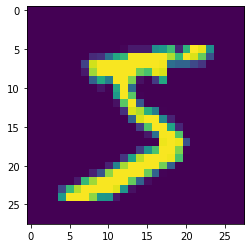

In [9]:
plt.imshow(X_train[0])  #显示第0张图片 


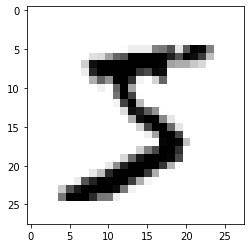

In [10]:
plt.imshow(X_train[0],cmap="binary")

In [11]:
#创建神经网络
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(1024,activation = "relu"))
model.add(tf.keras.layers.Dense(1024,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

2022-10-14 10:20:19.308802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-14 10:20:19.309115: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-14 10:20:19.309166: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-10-14 10:20:19.310636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#一定要有的，看模型长什么样子
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",  
             metrics=["acc"])

In [14]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [15]:
#训练模型
model.fit(X_train,y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 9s 11ms/step - loss: 2.4253 - acc: 0.9054 - val_loss: 0.3850 - val_acc: 0.9354
Epoch 2/15
750/750 [==============================] - 8s 11ms/step - loss: 0.2099 - acc: 0.9554 - val_loss: 0.2293 - val_acc: 0.9544
Epoch 3/15
750/750 [==============================] - 8s 11ms/step - loss: 0.1477 - acc: 0.9646 - val_loss: 0.2703 - val_acc: 0.9491
Epoch 4/15
750/750 [==============================] - 8s 11ms/step - loss: 0.1468 - acc: 0.9641 - val_loss: 0.2326 - val_acc: 0.9584
Epoch 5/15
750/750 [==============================] - 8s 11ms/step - loss: 0.1300 - acc: 0.9683 - val_loss: 0.2382 - val_acc: 0.9542
Epoch 6/15
750/750 [==============================] - 9s 11ms/step - loss: 0.1227 - acc: 0.9703 - val_loss: 0.2665 - val_acc: 0.9533
Epoch 7/15
750/750 [==============================] - 8s 11ms/step - loss: 0.1377 - acc: 0.9679 - val_loss: 0.1923 - val_acc: 0.9609
Epoch 8/15
750/750 [==============================] - 8s 11ms/step - 

In [16]:
pre = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [17]:
#plt.plot(his.history.epochs,his.history.get("loss"))

In [18]:
#pre=model.predict(X_train)

In [19]:
# 使用numpy返回最大的索引，即预测概率最大的值
pred=np.argmax(pre,axis=1)

In [20]:
pre[0]

array([4.9044378e-24, 2.0682157e-19, 6.5958051e-20, 2.4342607e-14,
       6.3243518e-27, 1.4838148e-35, 0.0000000e+00, 9.9999994e-01,
       1.1239022e-21, 6.3468262e-09], dtype=float32)

In [21]:
# 测试集上训练的情况
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.95      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.92      0.97      0.94       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [22]:
pre_ = model.predict(X_train)

1875/1875 [==============================] - 8s 4ms/step


In [23]:
pre_d = np.argmax(pre_,axis=1)

In [24]:
# 训练集上训练的情况
print(classification_report(y_train,pre_d))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.97      0.98      5958
           3       0.98      0.98      0.98      6131
           4       0.98      0.99      0.98      5842
           5       0.99      0.98      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.95      0.99      0.97      5851
           9       0.98      0.97      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



# 卷积神经网络

In [56]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
# import seaborn as sn11sae
from sklearn.metrics import classification_report 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [57]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context#下载数据集

In [58]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.mnist.load_data()

In [59]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),padding="same",activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,(3,3),padding = "same",activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(1024,(3,3),padding = "same",activation="relu"))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [60]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss="categorical_crossentropy",  
             metrics=["acc"])

In [61]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label = tf.keras.utils.to_categorical(test_label)

In [62]:
#训练模型
his = model.fit(train_image,train_label,epochs=5,batch_size=32,validation_data=(test_image,test_label))

Epoch 1/5
1875/1875 [==============================] - 386s 205ms/step - loss: 0.2971 - acc: 0.9159 - val_loss: 0.0839 - val_acc: 0.9748
Epoch 2/5
1875/1875 [==============================] - 410s 219ms/step - loss: 0.0801 - acc: 0.9763 - val_loss: 0.0557 - val_acc: 0.9829
Epoch 3/5
1875/1875 [==============================] - 390s 208ms/step - loss: 0.0577 - acc: 0.9822 - val_loss: 0.0614 - val_acc: 0.9811
Epoch 4/5
1875/1875 [==============================] - 388s 207ms/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0615 - val_acc: 0.9795
Epoch 5/5
1875/1875 [==============================] - 344s 183ms/step - loss: 0.0407 - acc: 0.9873 - val_loss: 0.0432 - val_acc: 0.9853


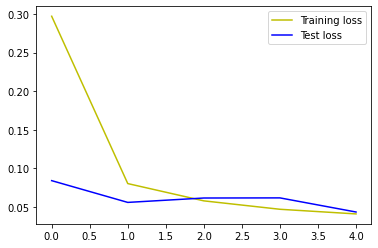

In [63]:
plt.plot(his.epoch,his.history.get("loss"),"y",label="Training loss")
plt.plot(his.epoch,his.history.get("val_loss"),"b",label="Test loss")
plt.legend()

In [64]:
pred = model.predict(test_image)

313/313 [==============================] - 21s 67ms/step


In [65]:
i = 24

In [66]:
np.argmax(pred[i])

4

In [67]:
np.argmax(test_label[i])

4